# Step 1 : Importing necessary libraries

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Step 2 : Reading Dataset

In [ ]:
heart_df= pd.read_csv('heart.csv')

In [ ]:
heart_df = pd.DataFrame(heart_df)

In [ ]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


 # Step 3 : Dataset Overview & Preparation



 ### Step 3.1 : Description Of Variables

age: Age of the patient in years

sex: Gender of the patient (0: female, 1: male)

cp: Type of chest pain (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)

trtbps: Resting blood pressure in mmHg

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar level categorized as above 120 mg/dl (0: false, 1: true)

restecg: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy)

thalachh: Maximum heart rate achieved during a stress test
exng: Exercise induced angina (0: no, 1: yes)

oldpeak: ST depression induced by exercise relative to rest (unit -> depression)

slp: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)

caa: Number of major vessels (0-4) colored by fluoroscopy
thall: Thalium stress test result (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described)

output: Heart disease status (0: no disease, 1: presence of disease

### Step 3.2 : Rename Variables

In [ ]:
# Renamed name of variables to have a better understanding while working on dataset:
heart_df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

In [ ]:
#Changed the integer values of some variables to categorical values based on description of variables:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

In [ ]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    heart_df[feature] = heart_df[feature].map(lambda x: map_values(x, mapping))
    heart_df[feature] = heart_df[feature].astype(object)

In [ ]:
#First five Row
heart_df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


 ### Step 3.4 : Basic Information

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    object 
 2   ChestPain             303 non-null    object 
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    object 
 6   RestingECG            303 non-null    object 
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    object 
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    object 
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    object 
 13  Status                303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


### Step 3.5 : Statistical Summary

In [ ]:
stats_heart_df = heart_df.copy()

In [ ]:
# Statistical summary of numerical data
stats_heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
RestingBloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
MaxHeartRate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
OldPeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
nMajorVessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


In [ ]:
# Statistical summary of categorical data
stats_heart_df.describe(include="object").T

,count,unique,top,freq
Sex,303,2,Male,207
ChestPain,303,4,Typical angina,143
FastingBloodSugar,303,2,False,258
RestingECG,303,3,Abnormality,152
ExcerciseAngina,303,2,No,204
STSlope,303,3,Downsloping,142
Thalium,303,4,Reversible defect,166
Status,303,2,Heart Disease,165


# Step 4 : Exploratary Data Analysis (EDA)



In [ ]:
heart_df_eda = heart_df.copy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_hist_plot(feature):
    plt.rcParams['axes.facecolor'] = '#D6F3FF'

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(heart_df_eda[feature], kde=True, color='#45b1e8', ax=axes[0])

    mean_value = heart_df_eda[feature].mean()
    median_value = heart_df_eda[feature].median()
    mode_value = heart_df_eda[feature].mode().values[0]
    std_value = heart_df_eda[feature].std()
    min_value = heart_df_eda[feature].min()
    max_value = heart_df_eda[feature].max()

    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    sns.boxplot(x=heart_df_eda[feature], ax=axes[1], color='#45b1e8')
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()


In [ ]:
# find outliers using IQR method
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]

    return outliers, lower_bound, upper_bound

In [ ]:
outliers = {}

### Step 4.1 : Univariate Analysis

In [ ]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

In [ ]:
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA']

    category_counts = heart_df_eda[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = heart_df_eda[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

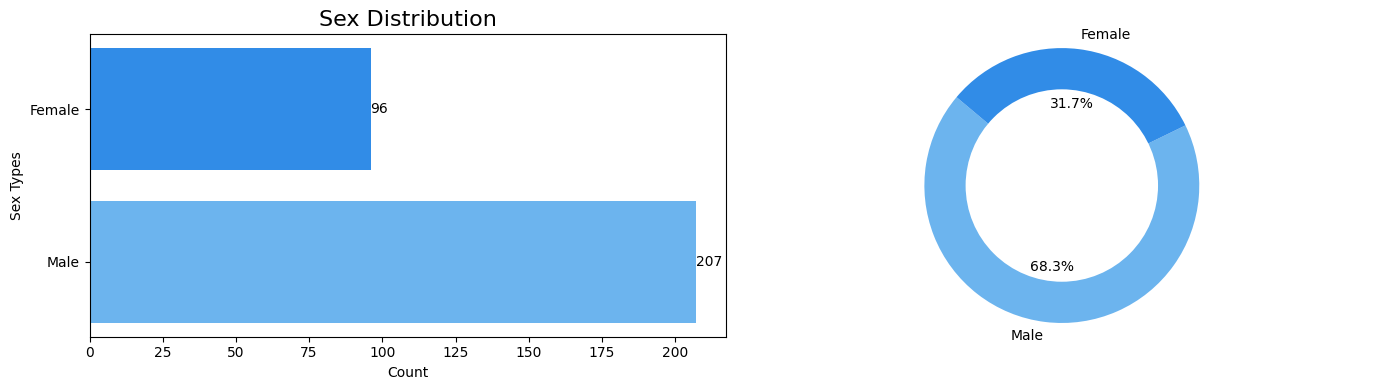

In [ ]:
# Sex
bar_donut_chart("Sex")

We can observe that we have Male majority data.

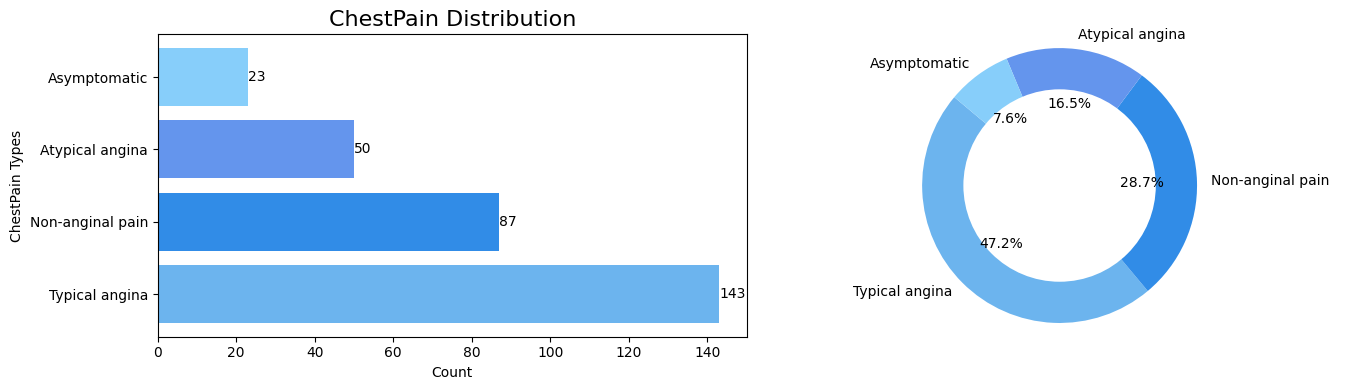

In [ ]:
#Chest Pain
bar_donut_chart("ChestPain")

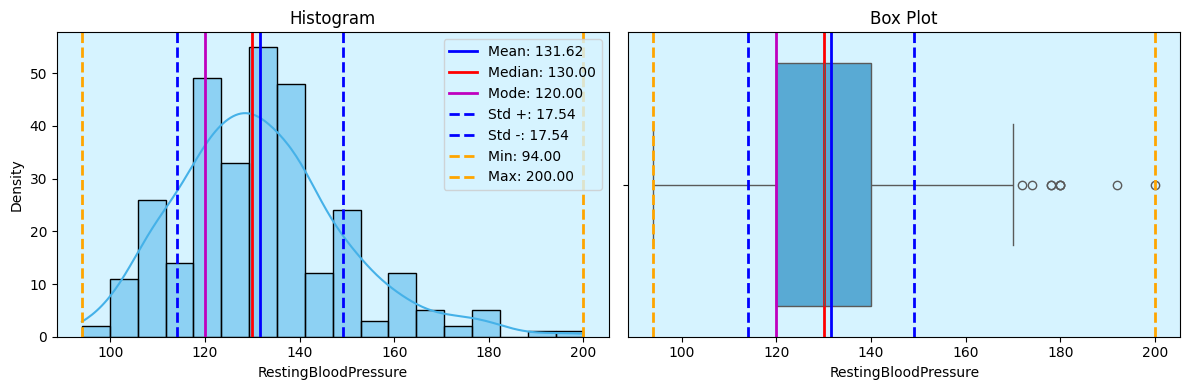

In [ ]:
#Resting Blood Pressure
box_hist_plot("RestingBloodPressure")

In [ ]:
skewness_dist(heart_df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


In [ ]:
#Outliers of Resting Blood Pressure column:
rbp_outliers, rbp_lower_bound, rbp_upper_bound = find_outliers(heart_df_eda['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound)
print("Upper Bound:", rbp_upper_bound)
print("Outliers:", len(rbp_outliers))

Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 9


In [ ]:
outliers.update({"RestingBloodPressure":len(rbp_outliers)})

In [ ]:
outliers

{'RestingBloodPressure': 9}

### Step 4.2 : Bivariate Analysis

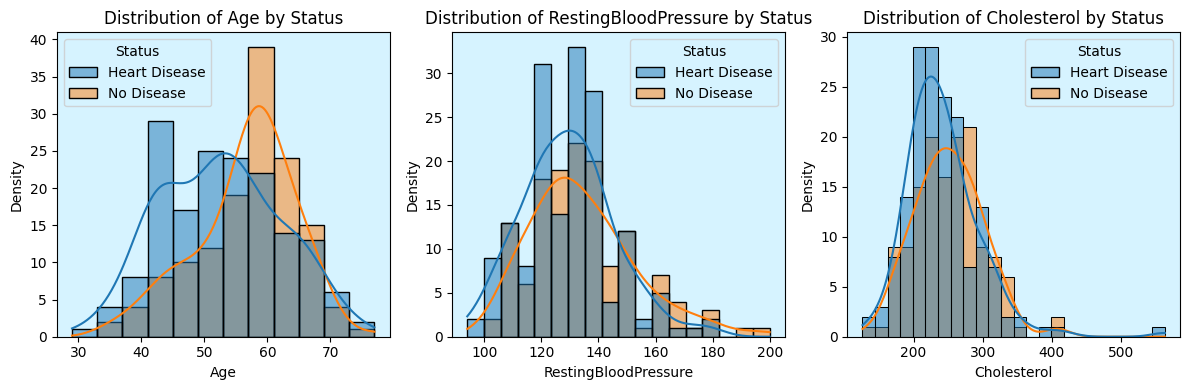

In [ ]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol']

fig, axes = plt.subplots( ncols=3, figsize=(12, 4))

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 3
    ax = axes[col]
    sns.histplot(data=heart_df_eda, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

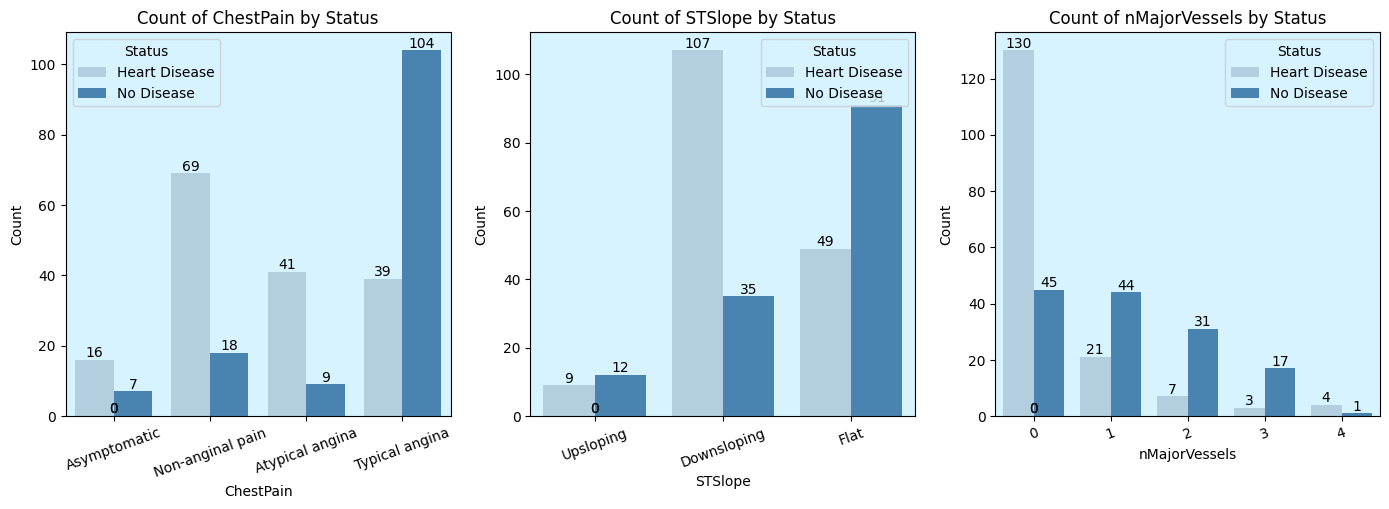

In [ ]:
#Binary & Categorical Variables
categorical_features = ['ChestPain', 'STSlope', 'nMajorVessels']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 1 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=heart_df_eda, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

We can observe that Non-anginal Pain is more likely to denote Heart Disease wrt to other Chest Pain.

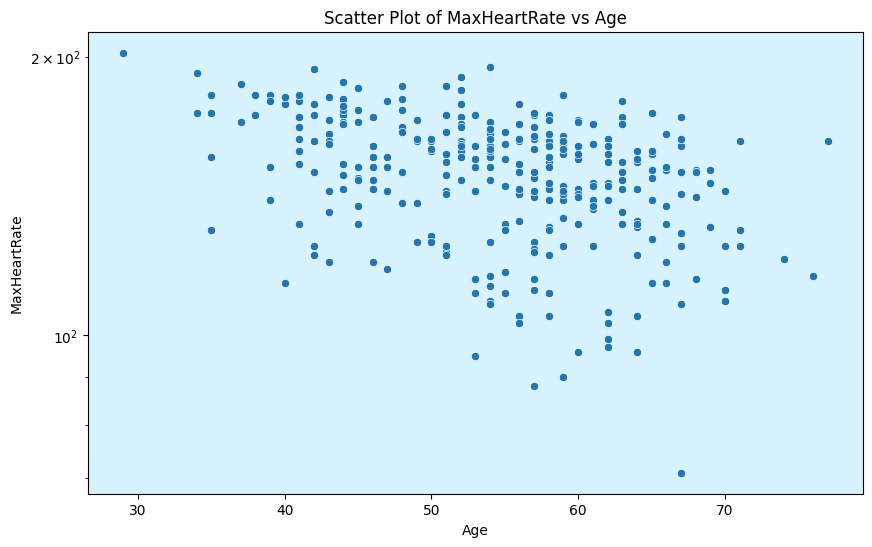

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='MaxHeartRate', data=heart_df)
scatter.set_title('Scatter Plot of MaxHeartRate vs Age')
scatter.set_xlabel('Age')
scatter.set_ylabel('MaxHeartRate')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.show()

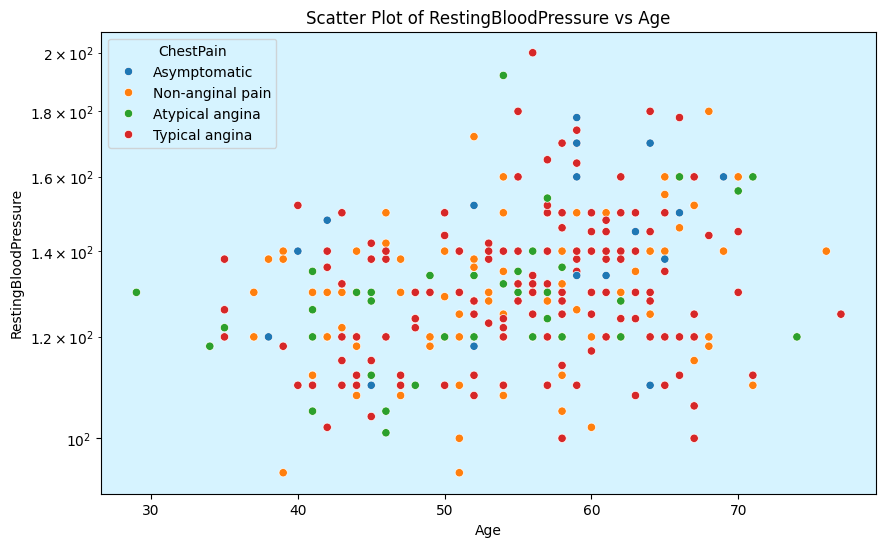

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='RestingBloodPressure', data=heart_df,hue="ChestPain")
scatter.set_title('Scatter Plot of RestingBloodPressure vs Age')
scatter.set_xlabel('Age')
scatter.set_ylabel('RestingBloodPressure')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.show()

The Scatterplots show no significant relations between Resting Blood Pressure and Max Heart Rate with Age.

# Step 5 : Correlation Analysis



In [ ]:
heart_df= pd.read_csv('heart.csv')
heart_df = pd.DataFrame(heart_df)

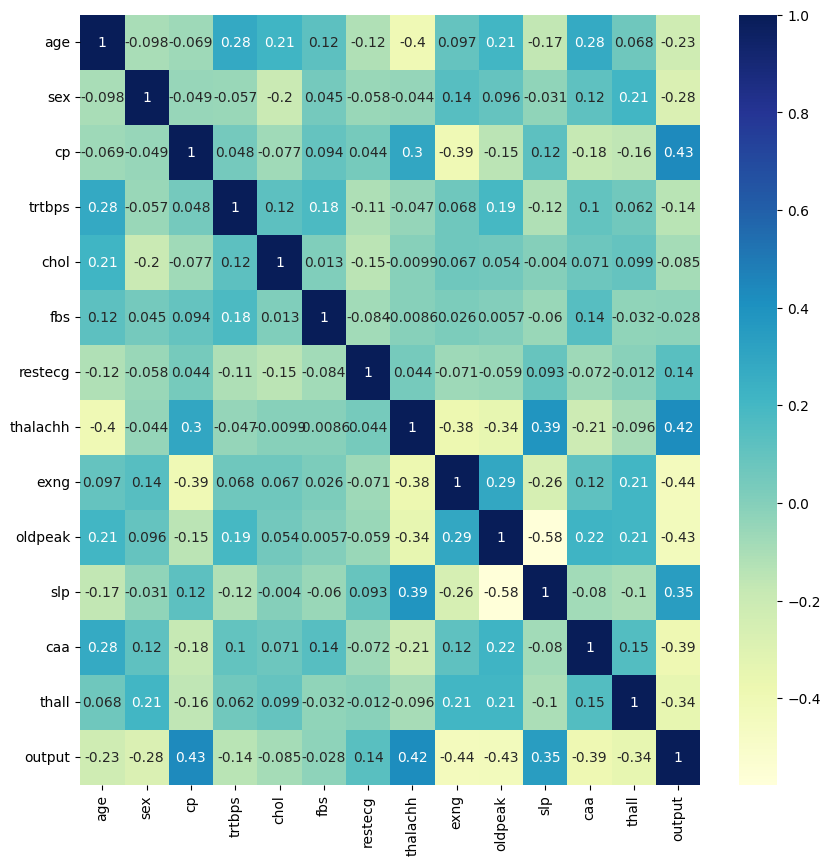

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(), cmap="YlGnBu", annot=True);

We observe that Chestpain and MaxHeartRate are having high correlation with Heart Disease.